In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
DATA_ROOT = '../data/raw'

In [5]:
files = []
for root, dirs, f in os.walk(DATA_ROOT, topdown=False):
    for name in f:
        files.append(os.path.join(root, name))

In [6]:
files

['../data/raw\\.gitkeep',
 '../data/raw\\GIT_COMMITS.csv',
 '../data/raw\\JIRA_ISSUES.csv',
 '../data/raw\\SONAR_MEASURES.csv',
 '../data/raw\\SZZ_FAULT_INDUCING_COMMITS.csv']

In [7]:
df = pd.read_csv(f'{DATA_ROOT}/JIRA_ISSUES.csv')

# DATA DESCRIPTION

In [8]:
os.listdir(DATA_ROOT)

['.gitkeep',
 'GIT_COMMITS.csv',
 'JIRA_ISSUES.csv',
 'SONAR_MEASURES.csv',
 'SZZ_FAULT_INDUCING_COMMITS.csv']

In [9]:
dfs = {}
for filename in os.listdir(DATA_ROOT):
  if filename[-4:] == '.csv':
    dfs[filename[:-4]] = pd.read_csv(f"{DATA_ROOT}/{filename}")
dfs.keys()

dict_keys(['GIT_COMMITS', 'JIRA_ISSUES', 'SONAR_MEASURES', 'SZZ_FAULT_INDUCING_COMMITS'])

In [10]:
for name, df in dfs.items():
  print(name, df.shape)

GIT_COMMITS (140687, 13)
JIRA_ISSUES (67427, 28)
SONAR_MEASURES (55629, 61)
SZZ_FAULT_INDUCING_COMMITS (27340, 7)


In [11]:
def data_description(df, info='correlations'):
  if info=='correlation':
    return df.corr()
    #return sn.heatmap(df.corr(), annot=True)
  elif info=='statistics':
    return df.describe()
  elif info=='types':
    return df.dtypes
  elif info=='distribution':
    # isint = np.logical_or(df.dtypes=='int64', df.dtypes=='bool')
    isint = df.dtypes=='int64'
    return df[isint.index[isint]].hist()
  elif info=='nans':
    n = dict()
    for column in df.columns:
      n[column] = len(df[df[column].isnull()])
    return n
  else:
    return 'Please ask for a valid information'

In [12]:
for name, df in dfs.items():
  print(f'{name} CORRELATION:')
  try:
    display(data_description(df, info='correlation'))
  except:
    print('NO DATA FOR CORRELATION')
  print(); print()


GIT_COMMITS CORRELATION:


,authorTimezone,committerTimezone,inMainBranch,merge
authorTimezone,1.000000,0.947741,NaN,0.281023
committerTimezone,0.947741,1.000000,NaN,0.276712
inMainBranch,NaN,NaN,NaN,NaN
merge,0.281023,0.276712,NaN,1.000000




JIRA_ISSUES CORRELATION:


,timeSpent,aggregatedTimeSpent,timeEstimate,timeOriginalEstimate,aggregateTimeEstimate,progressPercent,watchCount,votes
timeSpent,1.000000,0.859708,0.000140,0.312083,0.000140,-0.041715,0.065767,0.126329
aggregatedTimeSpent,0.859708,1.000000,-0.032011,0.108417,-0.034553,-0.032402,0.224252,0.592840
timeEstimate,0.000140,-0.032011,1.000000,0.999566,0.999964,-0.300468,0.183135,0.146996
timeOriginalEstimate,0.312083,0.108417,0.999566,1.000000,0.999530,-0.196502,0.182776,0.144038
aggregateTimeEstimate,0.000140,-0.034553,0.999964,0.999530,1.000000,-0.300468,0.180952,0.148621
progressPercent,-0.041715,-0.032402,-0.300468,-0.196502,-0.300468,1.000000,-0.013245,0.011442
watchCount,0.065767,0.224252,0.183135,0.182776,0.180952,-0.013245,1.000000,0.736749
votes,0.126329,0.592840,0.146996,0.144038,0.148621,0.011442,0.736749,1.000000




SONAR_MEASURES CORRELATION:


,classes,files,functions,commentLines,commentLinesDensity,complexity,fileComplexity,classComplexity,functionComplexity,coverage,...,developmentCost,sqaleDebtRatio,newSqaleDebtRatio,vulnerabilities,reliabilityRemediationEffort,reliabilityRating,securityRemediationEffort,securityRating,wontFixIssues,packageDependencyCycles
classes,1.000000,0.867955,0.985678,0.829864,-0.389609,0.972136,0.299125,-0.069834,0.413967,NaN,...,0.960268,-0.352371,-0.230517,0.876126,0.736775,0.438447,0.839931,0.269324,NaN,NaN
files,0.867955,1.000000,0.841383,0.950297,-0.292406,0.789128,-0.006402,-0.126508,0.321126,NaN,...,0.938383,-0.316581,-0.240641,0.919098,0.848464,0.409608,0.877374,0.255736,NaN,NaN
functions,0.985678,0.841383,1.000000,0.802879,-0.398531,0.989287,0.391334,-0.009827,0.406778,NaN,...,0.959535,-0.383886,-0.256630,0.846410,0.762006,0.451087,0.811213,0.279823,NaN,NaN
commentLines,0.829864,0.950297,0.802879,1.000000,-0.094609,0.737054,-0.043277,-0.097676,0.283216,NaN,...,0.875847,-0.315988,-0.234848,0.892760,0.818129,0.444139,0.848765,0.273409,NaN,NaN
commentLinesDensity,-0.389609,-0.292406,-0.398531,-0.094609,1.000000,-0.423050,-0.289008,-0.005110,-0.260746,NaN,...,-0.399815,0.314413,0.271468,-0.261170,-0.171932,-0.088750,-0.253794,-0.172926,NaN,NaN
complexity,0.972136,0.789128,0.989287,0.737054,-0.423050,1.000000,0.460889,0.026609,0.463550,NaN,...,0.936251,-0.365748,-0.242564,0.814183,0.718587,0.427480,0.780846,0.252563,NaN,NaN
fileComplexity,0.299125,-0.006402,0.391334,-0.043277,-0.289008,0.460889,1.000000,0.623886,0.465102,NaN,...,0.250827,-0.158356,-0.175920,0.075405,0.169026,0.218808,0.070610,0.120500,NaN,NaN
classComplexity,-0.069834,-0.126508,-0.009827,-0.097676,-0.005110,0.026609,0.623886,1.000000,0.491102,NaN,...,-0.041612,0.059508,-0.065205,-0.048381,-0.028534,0.085951,-0.054810,0.099983,NaN,NaN
functionComplexity,0.413967,0.321126,0.406778,0.283216,-0.260746,0.463550,0.465102,0.491102,1.000000,NaN,...,0.391509,0.139159,-0.019685,0.375904,0.262411,0.290386,0.361206,0.261796,NaN,NaN
coverage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


""




SZZ_FAULT_INDUCING_COMMITS CORRELATION:




In [13]:
for name, df in dfs.items():
  print(f'{name} STATISTICS:')
  try:
    display(data_description(df, info='statistics'))
  except:
    print('NO DATA FOR STATISTICS')
  print(); print()

GIT_COMMITS STATISTICS:


,authorTimezone,committerTimezone
count,140687.000000,140687.000000
mean,5269.280033,5480.770789
std,12460.674633,12437.009328
min,-46800.000000,-46800.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,14400.000000,14400.000000
max,36000.000000,36000.000000




JIRA_ISSUES STATISTICS:


,timeSpent,aggregatedTimeSpent,timeEstimate,timeOriginalEstimate,aggregateTimeEstimate,progressPercent,watchCount,votes
count,6012.000000,6.114000e+03,1.331000e+03,1.377000e+03,1.341000e+03,5999.000000,54696.000000,2938.000000
mean,8301.157685,9.358155e+03,2.374063e+05,2.342683e+05,2.419628e+05,98.971829,2.282726,1.710347
std,26484.951850,3.297818e+04,1.118528e+06,1.100765e+06,1.123447e+06,9.288872,1.666334,2.370982
min,60.000000,6.000000e+01,3.000000e+01,3.000000e+01,3.000000e+01,1.000000,1.000000,1.000000
25%,1800.000000,1.800000e+03,3.600000e+03,3.600000e+03,3.600000e+03,100.000000,1.000000,1.000000
50%,3600.000000,3.600000e+03,1.260000e+04,1.080000e+04,1.260000e+04,100.000000,2.000000,1.000000
75%,7800.000000,7.800000e+03,8.640000e+04,8.640000e+04,8.640000e+04,100.000000,3.000000,2.000000
max,864000.000000,1.148400e+06,3.063240e+07,3.063240e+07,3.063240e+07,100.000000,104.000000,66.000000




SONAR_MEASURES STATISTICS:


,classes,files,functions,commentLines,commentLinesDensity,complexity,fileComplexity,classComplexity,functionComplexity,coverage,...,developmentCost,sqaleDebtRatio,newSqaleDebtRatio,vulnerabilities,reliabilityRemediationEffort,reliabilityRating,securityRemediationEffort,securityRating,wontFixIssues,packageDependencyCycles
count,55629.000000,55629.000000,55629.000000,55629.000000,55629.000000,55629.000000,55629.000000,55629.000000,55629.000000,55629.0,...,5.562900e+04,55629.000000,55629.000000,55629.000000,55629.000000,55629.000000,55629.000000,55629.000000,55629.0,55629.0
mean,854.096263,723.677758,5814.283270,17577.502921,22.388128,12112.140179,18.202132,14.180902,1.856487,0.0,...,2.285828e+06,3.683147,3.497561,130.668087,800.194233,4.286703,1852.660213,3.708210,0.0,0.0
std,1009.364586,897.961615,6476.427272,18922.274369,8.682379,15175.782233,9.324140,4.827118,0.449558,0.0,...,2.816841e+06,1.211611,1.425353,201.152429,1277.461688,1.029744,2743.306816,0.854329,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0
25%,162.000000,138.000000,1401.000000,4205.000000,16.800000,2522.000000,13.100000,11.500000,1.600000,0.0,...,4.586700e+05,2.900000,2.777484,9.000000,65.000000,4.000000,115.000000,4.000000,0.0,0.0
50%,404.000000,378.000000,2946.000000,10221.000000,22.800000,5302.000000,15.700000,13.500000,1.800000,0.0,...,9.880500e+05,3.500000,3.378927,34.000000,255.000000,5.000000,460.000000,4.000000,0.0,0.0
75%,970.000000,1100.000000,7005.000000,22674.000000,28.000000,14080.000000,19.500000,15.700000,2.100000,0.0,...,2.986890e+06,4.200000,3.926475,168.000000,1095.000000,5.000000,2410.000000,4.000000,0.0,0.0
max,4351.000000,5227.000000,68425.000000,125220.000000,72.200000,139214.000000,67.700000,67.700000,4.300000,0.0,...,2.315064e+07,9.000000,80.606061,1050.000000,17343.000000,5.000000,14615.000000,4.000000,0.0,0.0




SZZ_FAULT_INDUCING_COMMITS STATISTICS:


,projectID,faultFixingCommitHash,faultFixingTimestamp,faultFixingfileChanged,faultInducingCommitHash,faultInducingTimestamp,key
count,27340,27340,27340,27340,27340,27340,27340
unique,33,8538,8476,10132,669,665,6928
top,accumulo,dd0c114d7c1d8c735b540b3e44b487a3ecb5d571,2013-03-06T19:49:48.000+0000,ambari-server/src/main/java/org/apache/ambari/...,e0880e263e4bf8662ba3848405200473a25dfc9f,2011-10-04T00:46:07.000+0000,ACCUMULO-41
freq,9606,1096,1096,95,5371,5371,2191


# DATA QUALITY VERIFICATION

In [14]:
for name, df in dfs.items():
  print(f'{name} NaNs:')
  try:
    display(data_description(df, info='nans'))
  except:
    print('NO DATA FOR NaNs')
  print(); print()

GIT_COMMITS NaNs:


{'projectID': 0,
 'commitHash': 0,
 'commitMessage': 0,
 'author': 34,
 'authorDate': 0,
 'authorTimezone': 0,
 'committer': 34,
 'committerDate': 0,
 'committerTimezone': 0,
 'branches': 0,
 'inMainBranch': 0,
 'merge': 0,
 'parents': 0}



JIRA_ISSUES NaNs:


{'projectID': 0,
 'key': 0,
 'creationDate': 0,
 'resolutionDate': 10705,
 'updateDate': 0,
 'dueDate': 66546,
 'resolution': 10705,
 'type': 0,
 'priority': 1082,
 'fixVersions': 19750,
 'versions': 24873,
 'timeSpent': 61415,
 'aggregatedTimeSpent': 61313,
 'timeEstimate': 66096,
 'timeOriginalEstimate': 66050,
 'aggregateTimeEstimate': 66086,
 'progressPercent': 61428,
 'componentName': 17013,
 'componentDescription': 17013,
 'description': 5985,
 'summary': 0,
 'watchCount': 12731,
 'votes': 64489,
 'labels': 59497,
 'creatorName': 84,
 'creatorActive': 84,
 'assignee': 19698,
 'reporter': 0}



SONAR_MEASURES NaNs:


{'commitHash': 0,
 'projectID': 0,
 'SQAnalysisDate': 0,
 'classes': 0,
 'files': 0,
 'functions': 0,
 'commentLines': 0,
 'commentLinesDensity': 0,
 'complexity': 0,
 'fileComplexity': 0,
 'classComplexity': 0,
 'functionComplexity': 0,
 'functionComplexityDistribution': 0,
 'fileComplexityDistribution': 0,
 'coverage': 0,
 'duplicatedLines': 0,
 'duplicatedBlocks': 0,
 'duplicatedFiles': 0,
 'duplicatedLinesDensity': 0,
 'violations': 0,
 'blockerViolations': 0,
 'criticalViolations': 0,
 'infoViolations': 0,
 'falsePositiveIssues': 0,
 'confirmedIssues': 0,
 'lastCommitDate': 0,
 'codeSmells': 0,
 'bugs': 0,
 'effortToReachMaintainabilityRatingA': 0,
 'afferentCouplings': 0,
 'efferentCouplings': 0,
 'cognitiveComplexity': 0,
 'lines': 0,
 'ncloc': 0,
 'nclocLanguageDistribution': 0,
 'linesToCover': 0,
 'lineCoverage': 0,
 'majorViolations': 0,
 'minorViolations': 0,
 'openIssues': 0,
 'sqaleRating': 0,
 'numberOfClassesAndInterfaces': 0,
 'missingPackageInfo': 0,
 'package': 0,
 '



SZZ_FAULT_INDUCING_COMMITS NaNs:


{'projectID': 0,
 'faultFixingCommitHash': 0,
 'faultFixingTimestamp': 0,
 'faultFixingfileChanged': 0,
 'faultInducingCommitHash': 0,
 'faultInducingTimestamp': 0,
 'key': 0}

In [17]:
dfs['GIT_COMMITS'].head()

,projectID,commitHash,commitMessage,author,authorDate,authorTimezone,committer,committerDate,committerTimezone,branches,inMainBranch,merge,parents
0,accumulo,e0880e263e4bf8662ba3848405200473a25dfc9f,ACCUMULO-1 initial checkin of source code\n\ng...,Keith Turner,2011-10-04T00:46:07Z,0,Keith Turner,2011-10-04T00:46:07Z,0,['master'],True,False,[]
1,accumulo,e8774c5ec3a35e042f320540b5f7e66ebd2d9e87,"ACCUMULO-2 moved cloudtrace for TRUNK, fixed p...",Billie Rinaldi,2011-10-04T16:57:13Z,0,Billie Rinaldi,2011-10-04T16:57:13Z,0,['master'],True,False,['e0880e263e4bf8662ba3848405200473a25dfc9f']
2,accumulo,2032ebbd0ed90734da39ca238bbd10dee24d0030,ACCUMULO-2 fixed thrift build script to point ...,Keith Turner,2011-10-04T18:39:18Z,0,Keith Turner,2011-10-04T18:39:18Z,0,['master'],True,False,['e8774c5ec3a35e042f320540b5f7e66ebd2d9e87']
3,accumulo,de297d4932e08625a5df146f0802041bb5aeb892,ACCUMULO-2 reverted change to config.html\n\ng...,Billie Rinaldi,2011-10-04T19:31:01Z,0,Billie Rinaldi,2011-10-04T19:31:01Z,0,['master'],True,False,['2032ebbd0ed90734da39ca238bbd10dee24d0030']
4,accumulo,34efaae87639a83b60fdb7274de4b45051025a3a,ACCUMULO-2 fixed cloudtrace references in cont...,Billie Rinaldi,2011-10-05T17:19:06Z,0,Billie Rinaldi,2011-10-05T17:19:06Z,0,['master'],True,False,['de297d4932e08625a5df146f0802041bb5aeb892']


# DATA EXPLORATION

In [18]:
projectID = 'commons-daemon'

## JIRA_ISSUES

In [19]:
JIRA_ISSUES = dfs['JIRA_ISSUES']
JIRA_ISSUES.head()

,projectID,key,creationDate,resolutionDate,updateDate,dueDate,resolution,type,priority,fixVersions,...,componentDescription,description,summary,watchCount,votes,labels,creatorName,creatorActive,assignee,reporter
0,commons-exec,EXEC-108,2018-09-18T11:15:58.000+0000,NaN,2018-09-18T11:15:58.000+0000,NaN,NaN,Bug,Major,NaN,...,NaN,When using Apache Exec to execute the followin...,Compatibility problem with Android ADB,1.0,NaN,NaN,natanieljr,True,NaN,natanieljr
1,commons-exec,EXEC-107,2018-07-04T12:09:47.000+0000,NaN,2018-07-04T12:09:47.000+0000,NaN,NaN,New Feature,Major,NaN,...,NaN,"Hi,\n\nI would like to start an independent pr...",Start independent process,1.0,NaN,NaN,stefanreich,True,NaN,stefanreich
2,commons-exec,EXEC-106,2018-03-06T11:32:51.000+0000,NaN,2018-03-09T15:50:48.000+0000,NaN,NaN,Improvement,Major,NaN,...,NaN,It looks like the Watchdog class could use vol...,Watchdog class could use volatile instead of s...,1.0,NaN,NaN,sebb,True,NaN,sebb
3,commons-exec,EXEC-105,2018-02-16T13:47:10.000+0000,NaN,2018-02-16T15:37:12.000+0000,NaN,NaN,Wish,Trivial,NaN,...,NaN,I want to apologize if this issue is not corre...,Small mistakes in the documentation for Apache...,2.0,NaN,NaN,IP,True,NaN,IP
4,commons-exec,EXEC-104,2017-08-04T11:57:39.000+0000,NaN,2017-08-04T11:57:39.000+0000,NaN,NaN,Bug,Major,NaN,...,NaN,[Travis CI reveals the following test failures...,"Test failure ""Exec34Test.testExec34_2:88 Watch...",1.0,NaN,NaN,krichter,True,NaN,krichter


Text(0.5, 1.0, 'Number of Jira Issues by date')

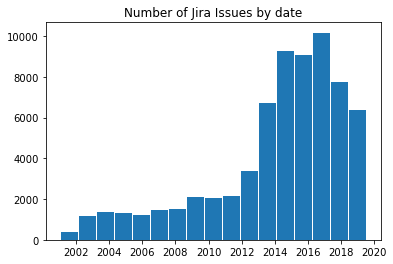

In [20]:
JIRA_ISSUES['creationDate'] = JIRA_ISSUES['creationDate'].apply(lambda d: pd.to_datetime(d))
#JIRA_ISSUES.creationDate.hist()
_ = plt.hist(JIRA_ISSUES.creationDate, bins = 17,rwidth=0.92 )
plt.title('Number of Jira Issues by date')

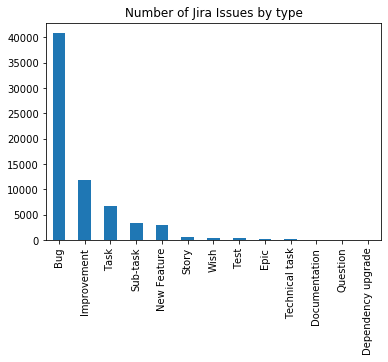

In [21]:
JIRA_ISSUES['type'].value_counts().plot(kind='bar', title = 'Number of Jira Issues by type')

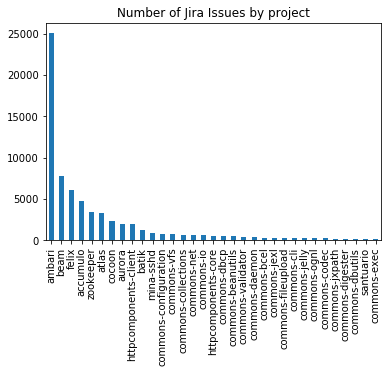

In [22]:
JIRA_ISSUES['projectID'].value_counts().plot(kind='bar', title = 'Number of Jira Issues by project')

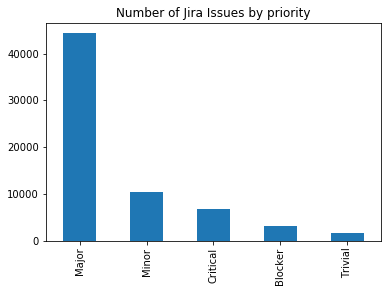

In [23]:
JIRA_ISSUES['priority'].value_counts().plot(kind='bar', title = 'Number of Jira Issues by priority')

In [24]:
JIRA_ISSUES['priority'].value_counts()

Major       44295
Minor       10455
Critical     6840
Blocker      3065
Trivial      1690
Name: priority, dtype: int64

In [25]:
44295/(JIRA_ISSUES['priority'].value_counts().sum())

0.6676463938503279

In [26]:
df = JIRA_ISSUES[['projectID', 'timeEstimate', 'timeSpent']].groupby('projectID').sum()
df['spent_over_estimate'] = df.apply(lambda r: r.timeSpent/r.timeEstimate, axis=1)
df.dropna().sort_values('spent_over_estimate', ascending=False).head(10)

,timeEstimate,timeSpent,spent_over_estimate
projectID,,,
beam,65693970.0,24322200.0,0.370235
accumulo,18840180.0,5220840.0,0.277112
ambari,79881768.0,15430320.0,0.193164
zookeeper,50462400.0,4125000.0,0.081744
atlas,7519260.0,600600.0,0.079875
commons-bcel,633660.0,10200.0,0.016097
mina-sshd,3521640.0,48600.0,0.013800
commons-collections,1497600.0,15000.0,0.010016
commons-io,1532280.0,14400.0,0.009398


(array([35., 36., 14., 15., 48., 43., 32., 13., 25., 21.]),
 array([731438.69325231, 732015.45973495, 732592.22621759, 733168.99270023,
        733745.75918287, 734322.52566551, 734899.29214815, 735476.05863079,
        736052.82511343, 736629.59159606, 737206.3580787 ]),
 <a list of 10 Patch objects>)

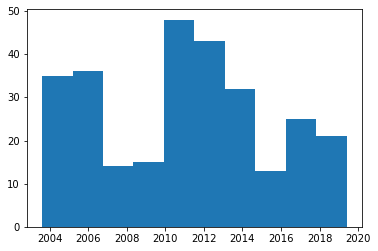

In [27]:
df = JIRA_ISSUES[(JIRA_ISSUES.projectID==projectID)&(JIRA_ISSUES['type']=='Bug')]
plt.hist(df.creationDate.tolist())

In [28]:
dfs['GIT_COMMITS'].isna().sum()

projectID             0
commitHash            0
commitMessage         0
author               34
authorDate            0
authorTimezone        0
committer            34
committerDate         0
committerTimezone     0
branches              0
inMainBranch          0
merge                 0
parents               0
dtype: int64

## SONAR_MEASURES

In [29]:
SONAR_MEASURES = dfs['SONAR_MEASURES']
SONAR_MEASURES.head()

,commitHash,projectID,SQAnalysisDate,classes,files,functions,commentLines,commentLinesDensity,complexity,fileComplexity,...,qualityGateDetails,qualityProfiles,newSqaleDebtRatio,vulnerabilities,reliabilityRemediationEffort,reliabilityRating,securityRemediationEffort,securityRating,wontFixIssues,packageDependencyCycles
0,5e90dbea078fca205d913efc8e61ba278c5f39d8,commons-daemon,2003-09-04T23:42:57Z,15,11,87,274,23.0,153,13.9,...,"{""level"":""ERROR"",""conditions"":[{""metric"":""bloc...","[{""key"":""java-sonar-way-04122"",""language"":""jav...",0.0,0,85,4,0,1,0,0
1,6c0eafee28fc5c8ab69215df31dc4f07c5579a34,commons-daemon,2003-09-05T08:50:36Z,15,11,87,274,23.0,153,13.9,...,"{""level"":""ERROR"",""conditions"":[{""metric"":""bloc...","[{""key"":""java-sonar-way-04122"",""language"":""jav...",0.0,0,85,4,0,1,0,0
2,7b73ce30f32318b99056fee53397c08063d6f661,commons-daemon,2003-09-12T09:05:57Z,15,11,87,274,23.0,153,13.9,...,"{""level"":""ERROR"",""conditions"":[{""metric"":""bloc...","[{""key"":""java-sonar-way-04122"",""language"":""jav...",0.0,0,85,4,0,1,0,0
3,7c9d9cde24a00cde7e584136355ce5e048e11e5e,commons-daemon,2003-09-12T09:08:51Z,15,11,87,274,23.0,153,13.9,...,"{""level"":""ERROR"",""conditions"":[{""metric"":""bloc...","[{""key"":""java-sonar-way-04122"",""language"":""jav...",0.0,0,85,4,0,1,0,0
4,91036e09f49a73fa40673a1071f8bc63f8cddc2f,commons-daemon,2003-09-16T08:34:06Z,15,11,87,274,23.0,153,13.9,...,"{""level"":""ERROR"",""conditions"":[{""metric"":""bloc...","[{""key"":""java-sonar-way-04122"",""language"":""jav...",0.0,0,85,4,0,1,0,0


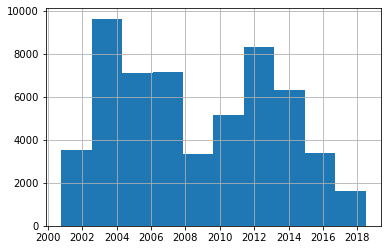

In [30]:
SONAR_MEASURES['SQAnalysisDate'] = SONAR_MEASURES['SQAnalysisDate'].apply(lambda d: pd.to_datetime(d))
SONAR_MEASURES.SQAnalysisDate.hist()

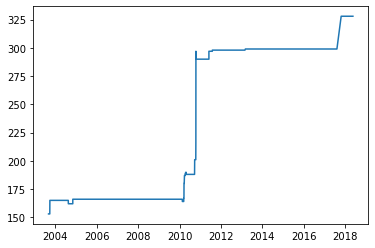

In [31]:
df = SONAR_MEASURES[['projectID', 'SQAnalysisDate', 'complexity', 'codeSmells']]
df = df[df.projectID == projectID]
plt.plot(df['SQAnalysisDate'].tolist(), df['complexity'].tolist())#, c=df['projectID'].tolist())

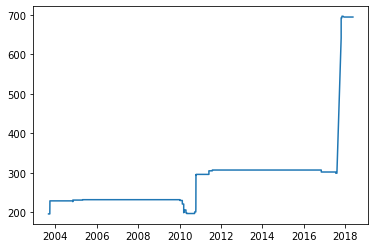

In [32]:
plt.plot(df['SQAnalysisDate'].tolist(), df['codeSmells'].tolist())

## GIT_COMMITS

In [ ]:
GIT_COMMITS = dfs['GIT_COMMITS']
GIT_COMMITS.head()

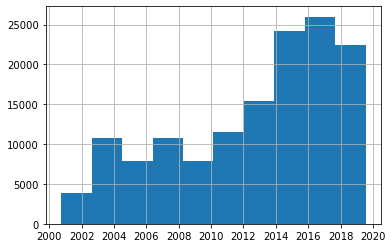

In [39]:
GIT_COMMITS['authorDate'] = GIT_COMMITS['authorDate'].apply(lambda d: pd.to_datetime(d))
GIT_COMMITS.authorDate.hist()

### SZZ_FAULT_INDUCING_COMMITS

In [40]:
SZZ_FAULT_INDUCING_COMMITS = dfs['SZZ_FAULT_INDUCING_COMMITS']
SZZ_FAULT_INDUCING_COMMITS.head()

,projectID,faultFixingCommitHash,faultFixingTimestamp,faultFixingfileChanged,faultInducingCommitHash,faultInducingTimestamp,key
0,commons-daemon,871c58c9cbfff95a4e3149e9df527401d17381fd,2017-07-09T22:42:35.000+0000,src/main/java/org/apache/commons/daemon/Daemon...,49cbb142a2b5d7d89aab077dc63f7646828c9408,2003-09-04T23:28:19.000+0000,DAEMON-370
1,commons-daemon,871c58c9cbfff95a4e3149e9df527401d17381fd,2017-07-09T22:42:35.000+0000,src/main/java/org/apache/commons/daemon/Daemon...,43d485a0e99c613daffba7d5b410e8e4a302e4f7,2003-09-26T09:26:04.000+0000,DAEMON-370
2,commons-daemon,871c58c9cbfff95a4e3149e9df527401d17381fd,2017-07-09T22:42:35.000+0000,src/main/java/org/apache/commons/daemon/Daemon...,4f232e47002359f1a8156b5f03b227c7bae9874a,2010-03-19T00:37:22.000+0000,DAEMON-370
3,commons-daemon,871c58c9cbfff95a4e3149e9df527401d17381fd,2017-07-09T22:42:35.000+0000,src/main/java/org/apache/commons/daemon/Daemon...,4f232e47002359f1a8156b5f03b227c7bae9874a,2010-03-19T00:37:22.000+0000,DAEMON-370
4,beam,e2583f5e73de50f8af128ecaa331a2e1046d2b08,2018-08-15T17:08:05.000+0000,sdks/java/core/src/main/java/org/apache/beam/s...,c880c8ebad0e83a068301d0bbf8c76be36a59962,2018-06-14T21:20:09.000+0000,BEAM-5145
